# SMAI Assignment - 3

## Question - `3` : Knowing MLPs

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

## Please read the following before moving on

Welcome to the world of Multilayer Perceptrons (MLP)! You already know that MLPs are feedforward neural networks consisting of multiple layers of nodes or neurons. These networks are well-suited for a wide range of classification and regression tasks, thanks to their ability to learn complex, non-linear relationships between inputs and outputs.

In this assignment, we will be working with the MNIST dataset to explore the importance of different MLP components. The MNIST dataset consists of 70,000 handwritten digit images, each of which is 28x28 pixels in size. Our goal is to use an MLP to classify these images into one of 10 categories (0-9).

To improve the performance of our MLP, we will experiment with various techniques such as Dropout, Batch Normalization, Loss Functions, Stochastic batch and mini-batch gradient descent, and more. Please note, you must use mini-batch unless explicity specified.

In addition, we will experiment with different optimization algorithms such as stochastic gradient descent, Adam, and RMSprop to find the optimal weights and biases for our MLP. We will use stochastic batch and mini-batch gradient descent, which involve updating the weights and biases of the network based on a small batch of randomly sampled training examples, to speed up the training process and reduce memory usage.

By the end of this assignment, you will have gained a deeper understanding of the various components that make up an MLP and their importance in achieving high performance in classification tasks. You will have gained hands-on experience in experimenting with these components and learned how to fine-tune an MLP to achieve the best possible performance on the MNIST dataset. So, let's get started!

🫵Pro-tip: Do not re-write any results so as to re-use them in later experiments for tabulation and plotting.

💭Trivia: Did you know code written using ChatGPT is easy to catch?

### Step zero: Import Libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### Step one: Using a PyTorch Dataset
Load MNIST dataset from `torchvision.datasets`

In [ ]:
transform = transforms.Compose([
                    transforms.ToTensor(), 
            ])



# Load MNIST dataset
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=64
                                                    , shuffle=True, num_workers=2)
trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1
                                                     , shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(dataset=testset, batch_size=64, shuffle=False)
testloader_stochastic = torch.utils.data.DataLoader(dataset=testset, batch_size=1, shuffle=False)


In [ ]:
from tqdm import tqdm
pbar = tqdm(total=len(trainloader_minibatch))
for idx, (data,label) in enumerate(trainloader_minibatch):
    print(idx,data.size(),label.size())
    pbar.update(1)
    break
pbar.refresh()

  0%|          | 1/938 [00:00<01:56,  8.03it/s]

0 torch.Size([64, 1, 28, 28]) torch.Size([64])


True

### Step two: Define a MLP Model and without any bells and whitsles...
... along with a CrossEntropy loss criterion 

Do not use Dropout, BN or any other thing. Use ReLU for hidden layers.

⚠️ Do not use SoftMax in the output as nn.CrossEntropyLoss combines SoftMax and NLLLoss.

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self,input_size, hidden_size, output_size):
        super(SimpleMLP,self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
    def forward(self,x):
        output = nn.functional.relu(self.fc1(x))
        output = self.fc2(output)
        return output


model = SimpleMLP(784, 128, 10)

criterion = nn.CrossEntropyLoss()


### Step three: Define the following optimizers using nn.optim
1. SGD
2. SGD with momentum
3. SGD with L2 regularization
4. RMSprop
5. Adam

In [ ]:
# code here
import torch.optim as optim
model1 = SimpleMLP(784, 128, 10)
model2 = SimpleMLP(784, 128, 10)
model3 = SimpleMLP(784, 128, 10)
model4 = SimpleMLP(784, 128, 10)
model5 = SimpleMLP(784, 128, 10)


sgdOpt = optim.SGD(model1.parameters(), lr=0.1)
sgdMomOpt= optim.SGD(model2.parameters(), lr=0.1, momentum= 0.9)
sgdl2Opt = optim.SGD(model3.parameters(), lr=0.1, weight_decay=0.001)
rmsPropOpt = optim.RMSprop(model4.parameters(), lr=0.001)
adamOpt = optim.Adam(model5.parameters(), lr=0.001)


### Step four: Run the SimpleMLP using different optimizers and plot train and test loss for each optimizer.
Explain the results.

Report final accuracy, F1 score and other relavant metrics in a tabular form on test and train datasets.

In [ ]:
# code, plots and explainiation here
# Train the model using each optimizer

def train(model, train_loader, optimizer, criterion, device):
    model.train()
    losses = 0
  
    for (images, label) in (train_loader):
       
        images = images.to(device)
        label=label.to(device)
        optimizer.zero_grad()
        images= images.reshape(images.shape[0], -1)
        outputs = model.forward(images)
        imagesx= images.reshape(images.shape[0], -1)
        outputsx= outputs.reshape(outputs.shape[0], -1)
        
        loss = criterion(outputsx, label)
        loss.backward()
        optimizer.step()
        losses += loss.item()
        num , predictions = torch.max(outputsx.data, 1)
    ytest_actual=[]
    ytest_pred =[]

      # Compute test loss
    with torch.no_grad():
        for idx,(inputst, labelst) in enumerate(testloader):
            inputst = inputst.reshape(inputst.shape[0], -1)
            outputs = model(inputst)
            
            var , testpredictions = torch.max(outputs.data, 1)
            ytest_actual += labelst.tolist()
            ytest_pred += testpredictions.tolist()

    return label, predictions,ytest_actual,ytest_pred




from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
optimizers = [sgdOpt, sgdMomOpt, sgdl2Opt , rmsPropOpt, adamOpt]
optimizer_names = ['SGD', 'SGD_with_momentum', 'SGD_with_L2_regularization', 'RMSprop', 'Adam']
train_losses = []
test_losses = []
for i in range(len(optimizers)):
  train_losses.append([])
  test_losses.append([])
res=[]

modellist=[model1,model2,model3,model4,model5]
# model = SimpleMLP(784, 128, 10)
# criterion = nn.CrossEntropyLoss()
for ind, opt in enumerate(optimizers):
  modelx=modellist[ind]

  for epoch in range(5):

      pbar = tqdm(total=len(trainloader_minibatch))
      
      labels,predictions,testlabels,testpred=train(modelx, trainloader_minibatch, opt, criterion, device)
      ytrain_actual=[]
      ytrain_pred=[]
      
     
      ytrain_actual += labels.tolist()
      ytrain_pred += predictions.tolist()
      
      ytest_actual=[]
      ytest_pred =[]
      ytest_actual+=testlabels
      ytest_pred += testpred


       
      pbar.refresh()
      pbar.close()
  
      if epoch==4:
        res.append({'optimizer name':optimizer_names[ind],
                    'datatype':'training data',
                    'accuracy_scores':accuracy_score(ytrain_actual, ytrain_pred),
                    'f1 score':f1_score(ytrain_actual, ytrain_pred, average='weighted'),
                    'precision':precision_score(ytrain_actual, ytrain_pred, average='weighted'),
                    'recall':recall_score(ytrain_actual, ytrain_pred, average='weighted')})
        
        res.append({'optimizer name':optimizer_names[ind],
                    'datatype':'testing data',
                    'accuracy_scores':accuracy_score( ytest_actual, ytest_pred),
                    'f1 score':f1_score( ytest_actual, ytest_pred, average='weighted'),
                    'precision':precision_score( ytest_actual, ytest_pred, average='weighted'),
                    'recall':recall_score( ytest_actual, ytest_pred, average='weighted')})

df = pd.DataFrame(res)
print(" ")
print(" ")
print(" ")
print("")


print(df)





    
# Plot the train and test loss for each optimizer


  0%|          | 0/938 [00:13<?, ?it/s]

 
 
 

               optimizer name       datatype  accuracy_scores  f1 score  \
0                         SGD  training data          1.00000  1.000000   
1                         SGD   testing data          0.96960  0.969567   
2           SGD_with_momentum  training data          1.00000  1.000000   
3           SGD_with_momentum   testing data          0.97120  0.971171   
4  SGD_with_L2_regularization  training data          1.00000  1.000000   
5  SGD_with_L2_regularization   testing data          0.96070  0.960680   
6                     RMSprop  training data          1.00000  1.000000   
7                     RMSprop   testing data          0.97630  0.976299   
8                        Adam  training data          0.96875  0.968434   
9                        Adam   testing data          0.97480  0.974786   

   precision   recall  
0   1.000000  1.00000  
1   0.969637  0.96960  
2   1.000000  1.00000  
3   0.971489  0.97120  
4   1.000000  1.00000  
5   0.961149  0.96070  

In [ ]:
print(accuracy_score(ytrain_actual, ytrain_pred))

0.09375


In [ ]:
# sample code: need not rely on this
# EPOCHS = 25

# train_loss = []
# val_loss = []

# mlp.train()

# for epoch in range(EPOCHS):
#     pbar = tqdm(total=len(trainloader))
#     out_loss = 0
#     for batch_idx, (data, target) in enumerate(trainloader):
#         # do things
        
#         if torch.cuda.is_available():
#             data,target = data.cuda(),target.cuda()
        
#         out = mlp(data)
#         # do things
#         out_loss += loss.cpu().data.item()
#         # do things
#         pbar.update(1)
#         pbar.desc= f'Loss: {loss.item()}'
#     train_loss.append(out_loss/len(trainloader))
#     with torch.no_grad():
#         out_loss = 0
#         for batch_idx, (data, target) in enumerate(testloader):
#             # do things
            
#         val_loss.append(out_loss/len(testloader))
#     print()
#     pbar.refresh()
#     pbar.close()

# plot_losses(train_loss,val_loss)
# final_metrics = get_metrics_somehow(mlp,trainloader,testloader)

IndentationError: ignored

### Step five: Using SimpleMLP and Adam optimizer, train models using 2 different lr_schedulers.
Select 2 of **MultiplicativeLR**, **MultiStepLR**, **LinearLR** and **ExponentialLR**

Compare the results among different LR schedulers and the original model which didn't employ any LR scheduler. Compile results in a tabular form. Plot losses for each. Explain results.

0
1
2
3
4
                                    schedular  name  epoch  accuracy_scores  \
0    <class 'torch.optim.lr_scheduler.MultiStepLR'>      4              1.0   
1  <class 'torch.optim.lr_scheduler.ExponentialLR'>      4              1.0   

   accuracy_scores for testing   training loss  testing loss  
0                        0.9747       0.063168      0.080100  
1                        0.9743       0.066818      0.084796  


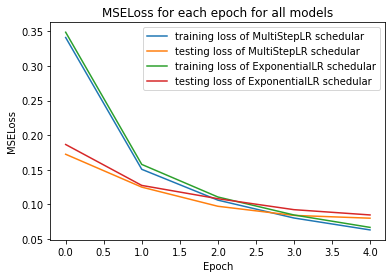

In [ ]:
# code and analysis here
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR, ExponentialLR

def train(model, optimizer, scheduler1, criterion, train_loader, testloader,device):
    model.train()
    losses = 0
    trainLosses=[]
    testlosses=[]
    for (images, label) in (train_loader):
       
        images = images.to(device)
        label=label.to(device)
        optimizer.zero_grad()
        images= images.reshape(images.shape[0], -1)
        outputs = model.forward(images)
        imagesx= images.reshape(images.shape[0], -1)
        outputsx= outputs.reshape(outputs.shape[0], -1)
        
        loss = criterion(outputsx, label)
        loss.backward()
        optimizer.step()
        losses += loss.item()
        num , predictions = torch.max(outputsx.data, 1)
    trainLosses=losses/ len(train_loader)
    ytest_actual=[]
    ytest_pred =[]
    losses = 0
      # Compute test loss
    with torch.no_grad():
        for idx,(inputst, labelst) in enumerate(testloader):
            inputst = inputst.reshape(inputst.shape[0], -1)
            outputs = model(inputst)
            loss = criterion(outputs, labelst)
            losses += loss.item()
            var , testpredictions = torch.max(outputs.data, 1)
            ytest_actual += labelst.tolist()
            ytest_pred += testpredictions.tolist()
    testLosses=losses/ len(testloader)

    return label, predictions,ytest_actual,ytest_pred,trainLosses, testLosses







modelsc1 = SimpleMLP(784, 128, 10)
modelsc2 = SimpleMLP(784, 128, 10)
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(modelsc1.parameters(), lr=0.001)
optimizer2 = optim.Adam(modelsc2.parameters(), lr=0.001)


scheduler1 = optim.lr_scheduler.MultiStepLR(optimizer1, milestones=[10, 20, 30], gamma=0.1)
scheduler2 = optim.lr_scheduler.ExponentialLR(optimizer2, gamma=0.95)
res=[]
sc1losstrain=[]
sc1losstest=[]

sc2losstrain=[]
sc2losstest=[]


for epoch in range(5):
  print(epoch)
  ytrain_actual,ytrain_pred,ytest_actual,ytest_pred,training_loss,testing_loss=train(modelsc1, optimizer1, scheduler1, criterion, trainloader_minibatch, testloader,device)
  if epoch==4:
    res.append({'schedular  name': MultiStepLR,
                  'epoch':epoch,
                  
                  'accuracy_scores':accuracy_score(ytrain_actual, ytrain_pred),
                  'accuracy_scores for testing ':accuracy_score(ytest_actual, ytest_pred),
                  'training loss':training_loss,
                  'testing loss': testing_loss})
  

  sc1losstrain.append(training_loss)
  sc1losstest.append(testing_loss)
                  
    

  ytrain_actual,ytrain_pred,ytest_actual,ytest_pred,training_loss,testing_loss=train(modelsc2, optimizer2, scheduler2, criterion, trainloader_minibatch, testloader,device)
  if epoch==4:
    res.append({'schedular  name':ExponentialLR,
                  'epoch':epoch,
                  'accuracy_scores':accuracy_score(ytrain_actual, ytrain_pred),
                  'accuracy_scores for testing ':accuracy_score(ytest_actual, ytest_pred),
                  'training loss':training_loss,
                  'testing loss': testing_loss})
  sc2losstrain.append(training_loss)
  sc2losstest.append(testing_loss)
df = pd.DataFrame(res)
print(df)



import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots()

ax.plot(sc1losstrain, label='training loss of MultiStepLR schedular')
ax.plot(sc1losstest, label='testing loss of MultiStepLR schedular')
ax.plot(sc2losstrain, label='training loss of ExponentialLR schedular')

ax.plot(sc2losstest, label='testing loss of ExponentialLR schedular')

ax.set_title('MSELoss for each epoch for all models')
ax.set_xlabel('Epoch')
ax.set_ylabel('MSELoss')

ax.legend()

plt.show()




### Step six: Define 3 models with following changes:
1. Add BatchNorm
2. Add Dropout
3. Add BatchNorm and Dropout

In [ ]:
# code here

import torch.nn as nn


class MLP_BN(nn.Module):
    def __init__(self):
        super(MLP_BN, self).__init__()
        self.trans=  nn.ModuleList()
        self.trans.append(nn.Linear(784, 128))
        self.trans.append(nn.BatchNorm1d(128))
        self.trans.append(nn.ReLU())
        self.trans.append(nn.Linear(128, 10))


    def forward(self, x):
        for i in self.trans:
          x=i(x)
        return x

class MLP_Dropout(nn.Module):
    def __init__(self):
        super(MLP_Dropout, self).__init__()
        self.trans=  nn.ModuleList()
        self.trans.append(nn.Linear(784, 128))
        self.trans.append(nn.BatchNorm1d(128))
        self.trans.append(nn.Dropout(p=0.5))
        self.trans.append(nn.Linear(128, 10))

    def forward(self, x):
        for i in self.trans:
          x=i(x)
        return x

class MLP_BN_Dropout(nn.Module):
    def __init__(self):
        super(MLP_BN_Dropout, self).__init__()
        self.trans=  nn.ModuleList()
        self.trans.append(nn.Linear(784, 128))
        self.trans.append(nn.BatchNorm1d(128))
        self.trans.append(nn.ReLU())
        self.trans.append(nn.Dropout(p=0.5))
        self.trans.append(nn.Linear(128, 10))

    def forward(self, x):
        for i in self.trans:
          x=i(x)
        return x


### Step seven: Train the above models and compare with SimpleMLP.

Use your choice of optimizer, use no lr_scheduler so as to re-use the previous results.

Perform analysis. You've got the drill by now.

In [ ]:
# code here

import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR, ExponentialLR





def train(model, optimizer, scheduler1, criterion, train_loader, testloader,device):
    model.train()
    losses = 0
    trainLosses=[]
    testlosses=[]
    for (images, label) in (train_loader):
       
        images = images.to(device)
        label=label.to(device)
        optimizer.zero_grad()
        images= images.reshape(images.shape[0], -1)
        outputs = model.forward(images)
        imagesx= images.reshape(images.shape[0], -1)
        outputsx= outputs.reshape(outputs.shape[0], -1)
        
        loss = criterion(outputsx, label)
        loss.backward()
        optimizer.step()
        losses += loss.item()
        num , predictions = torch.max(outputsx.data, 1)
    trainLosses=losses/ len(train_loader)
    ytest_actual=[]
    ytest_pred =[]
    losses = 0
      # Compute test loss
    with torch.no_grad():
        for idx,(inputst, labelst) in enumerate(testloader):
            inputst = inputst.reshape(inputst.shape[0], -1)
            outputs = model(inputst)
            loss = criterion(outputs, labelst)
            losses += loss.item()
            var , testpredictions = torch.max(outputs.data, 1)
            ytest_actual += labelst.tolist()
            ytest_pred += testpredictions.tolist()
    testLosses=losses/ len(testloader)

    return label, predictions,ytest_actual,ytest_pred,trainLosses, testLosses




model = SimpleMLP(784, 128, 10)
model_MLP_BN = MLP_BN()
model_MLP_Dropout = MLP_Dropout()
model_MLP_BN_Dropout = MLP_BN_Dropout()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer_MLP_BN = optim.Adam(model_MLP_BN.parameters(), lr=0.001)
optimizer_MLP_DROPOUT = optim.Adam(model_MLP_Dropout.parameters(), lr=0.001)
optimizer_MLP_BN_DROPOUT = optim.Adam(model_MLP_BN_Dropout.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20, 30], gamma=0.1)
scheduler_MLP_BN = optim.lr_scheduler.MultiStepLR(optimizer_MLP_BN, milestones=[10, 20, 30], gamma=0.1)

scheduler_MLP_DROPOUT = optim.lr_scheduler.MultiStepLR(optimizer_MLP_DROPOUT, milestones=[10, 20, 30], gamma=0.1)

scheduler_MLP_BN_DROPOUT = optim.lr_scheduler.MultiStepLR(optimizer_MLP_BN_DROPOUT , milestones=[10, 20, 30], gamma=0.1)
res=[]
for epoch in range(5):
  print(epoch)
  ytrain_actual,ytrain_pred,ytest_actual,ytest_pred,training_loss,testing_loss=train(model , optimizer,scheduler, criterion, trainloader_minibatch, testloader,device)
  if epoch==4:
    res.append({'model name': 'model',
                  'epoch':epoch+1,
                  
                  'accuracy_scores':accuracy_score(ytrain_actual, ytrain_pred),
                  'accuracy_scores for testing ':accuracy_score(ytest_actual, ytest_pred),
                  'training loss':training_loss,
                  'testing loss': testing_loss})
                  
    

  ytrain_actual,ytrain_pred,ytest_actual,ytest_pred,training_loss,testing_loss=train(model_MLP_BN , optimizer_MLP_BN ,scheduler_MLP_BN, criterion, trainloader_minibatch, testloader,device)
  if epoch==4:
    res.append({'model name': 'model_MLP_BN',
                  'epoch':epoch+1,
                  'accuracy_scores':accuracy_score(ytrain_actual, ytrain_pred),
                  'accuracy_scores for testing ':accuracy_score(ytest_actual, ytest_pred),
                  'training loss':training_loss,
                  'testing loss': testing_loss})
  ytrain_actual,ytrain_pred,ytest_actual,ytest_pred,training_loss,testing_loss=train(model_MLP_Dropout , optimizer_MLP_DROPOUT,scheduler_MLP_DROPOUT, criterion, trainloader_minibatch, testloader,device)
  if epoch==4:
    res.append({'model name': 'model_MLP_Dropout',
                  'epoch':epoch+1,
                  'accuracy_scores':accuracy_score(ytrain_actual, ytrain_pred),
                  'accuracy_scores for testing ':accuracy_score(ytest_actual, ytest_pred),
                  'training loss':training_loss,
                  'testing loss': testing_loss})
  ytrain_actual,ytrain_pred,ytest_actual,ytest_pred,training_loss,testing_loss=train(model_MLP_BN_Dropout , optimizer_MLP_BN_DROPOUT, scheduler_MLP_BN_DROPOUT, criterion, trainloader_minibatch, testloader,device)
  if epoch==4:
    res.append({'model name': 'model_MLP_BN_Dropout',
                  'epoch':epoch+1,
                  'accuracy_scores':accuracy_score(ytrain_actual, ytrain_pred),
                  'accuracy_scores for testing ':accuracy_score(ytest_actual, ytest_pred),
                  'training loss':training_loss,
                  'testing loss': testing_loss})
df = pd.DataFrame(res)
print(df)



0


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f910f81aca0>Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f910f81aca0>
Traceback (most recent call last):

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
self._shutdown_workers()    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
if w.is_alive():
    if w.is_alive():  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in 

1


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f910f81aca0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f910f81aca0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

2
3
4
             model name  epoch  accuracy_scores  accuracy_scores for testing   \
0                 model      5          1.00000                        0.9742   
1          model_MLP_BN      5          1.00000                        0.9722   
2     model_MLP_Dropout      5          0.84375                        0.9110   
3  model_MLP_BN_Dropout      5          0.93750                        0.9448   

   training loss  testing loss  
0       0.063620      0.083512  
1       0.053086      0.092011  
2       0.328185      0.316678  
3       0.179730      0.185175  


### Step eight: Mini-batch vs Stocastic
Now that you might have a clear winner in your mind regarding which model and settings perform the best, train it on mini-batch and stocastic and compare time taken, loss curve, accuracy etc.

Perform an analysis like never before!

0
1
2
       loader  epoch  accuracy_scores  accuracy_scores for testing   \
0  mini batch      2           0.9375                        0.9695   
1   stocastic      2           1.0000                        0.9706   

   training loss  testing loss  
0       0.108894      0.100793  
1       0.107259      0.127516  


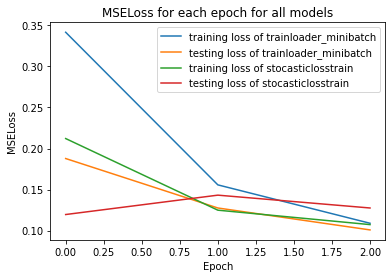

In [ ]:
# code here# code and analysis here
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR, ExponentialLR

def trainloader(model, optimizer, scheduler1, criterion, train_loader, testloader,device):
    model.train()
    losses = 0
    trainLosses=[]
    testlosses=[]
    for (images, label) in (train_loader):
       
        images = images.to(device)
        label=label.to(device)
        optimizer.zero_grad()
        images= images.reshape(images.shape[0], -1)
        outputs = model.forward(images)
        imagesx= images.reshape(images.shape[0], -1)
        outputsx= outputs.reshape(outputs.shape[0], -1)
        
        loss = criterion(outputsx, label)
        loss.backward()
        optimizer.step()
        losses += loss.item()
        num , predictions = torch.max(outputsx.data, 1)
    trainLosses=losses/ len(train_loader)
    ytest_actual=[]
    ytest_pred =[]
    losses = 0
      # Compute test loss
    with torch.no_grad():
        for idx,(inputst, labelst) in enumerate(testloader):
            inputst = inputst.reshape(inputst.shape[0], -1)
            outputs = model(inputst)
            loss = criterion(outputs, labelst)
            losses += loss.item()
            var , testpredictions = torch.max(outputs.data, 1)
            ytest_actual += labelst.tolist()
            ytest_pred += testpredictions.tolist()
    testLosses=losses/ len(testloader)

    return label, predictions,ytest_actual,ytest_pred,trainLosses, testLosses








model_stocastic = SimpleMLP(784, 128, 10)
model_minibatch = SimpleMLP(784, 128, 10)

criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model_minibatch.parameters(), lr=0.001)
optimizer2 = optim.Adam(model_stocastic.parameters(), lr=0.001)

scheduler1 = optim.lr_scheduler.MultiStepLR(optimizer1, milestones=[10, 20, 30], gamma=0.1)
scheduler2 = optim.lr_scheduler.MultiStepLR(optimizer2, milestones=[10, 20, 30], gamma=0.1)


res=[]
batchlosstrain=[]
batchlosstest=[]

stocasticlosstrain=[]
stocasticlosstest=[]


for epoch in range(3):
  print(epoch)
  ytrain_actual,ytrain_pred,ytest_actual,ytest_pred,training_loss,testing_loss=trainloader(model_minibatch , optimizer1, scheduler1, criterion, trainloader_minibatch, testloader,device)
  if epoch==2:
    res.append({'loader': 'mini batch',
                  'epoch':epoch,
                  
                  'accuracy_scores':accuracy_score(ytrain_actual, ytrain_pred),
                  'accuracy_scores for testing ':accuracy_score(ytest_actual, ytest_pred),
                  'training loss':training_loss,
                  'testing loss': testing_loss})
  

  batchlosstrain.append(training_loss)
  batchlosstest.append(testing_loss)
                  
    

  ytrain_actual,ytrain_pred,ytest_actual,ytest_pred,training_loss,testing_loss=trainloader(model_stocastic, optimizer2, scheduler2, criterion, trainloader_stochastic, testloader_stochastic ,device)
  if epoch==2:
    res.append({'loader':'stocastic',
                  'epoch':epoch,
                  'accuracy_scores':accuracy_score(ytrain_actual, ytrain_pred),
                  'accuracy_scores for testing ':accuracy_score(ytest_actual, ytest_pred),
                  'training loss':training_loss,
                  'testing loss': testing_loss})
  stocasticlosstrain.append(training_loss)
  stocasticlosstest.append(testing_loss)
df = pd.DataFrame(res)
print(df)



import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots()

ax.plot(batchlosstrain, label='training loss of trainloader_minibatch')
ax.plot(batchlosstest, label='testing loss of trainloader_minibatch')
ax.plot(stocasticlosstrain, label='training loss of stocasticlosstrain')

ax.plot(stocasticlosstest , label='testing loss of stocasticlosstrain')

ax.set_title('MSELoss for each epoch for all models')
ax.set_xlabel('Epoch')
ax.set_ylabel('MSELoss')

ax.legend()

plt.show()





### And most importantly!!! What did we learn?
Discuss any and all learnings here. The discussions must be all-encompassing so that we know what did you learn. 

Please do not copy from your friend or copy-paste from the internet. We can see repetitions during evaluations.

# text here

Firstly,  i learn  how to train ml model optimizer like- 'SGD', 'SGD_with_momentum', 'SGD_with_L2_regularization', 'RMSprop', 'Adam'. secondly , i learn about different schedular.
and also train the network using different loader . and its also observable that mini batch take shortwer time than stochastic. i did different type of analyisis.
another thing this we really need gpu for processing this type of network.